In [1]:
import requests
import bs4
import json
import pandas as pd

In [5]:
def fetch_id(num):
    df=pd.read_csv("C:/Users/Sreenath SP/Downloads/links.csv")
    start =0
    end=start+num
    list_movies=list(df.imdbId)
    return list_movies[start:end]

def scrape_id(list_movies):
    url = "https://www.imdb.com/title/tt{}".format(str(list_movies).zfill(7))
    response = requests.get(url)
    html_parse=bs4.BeautifulSoup(response.text,"html.parser")
    current_page_json=html_parse.find("script",attrs={"type":"application/ld+json"})
    current_page_json=str(current_page_json)[str(current_page_json).find('{'): -9]
    return current_page_json

def collect_parameters(list_movies):
    json_dict=json.loads(scrape_id(list_movies))
    movie={
        "name":json_dict['name'],
        "rating": json_dict['aggregateRating']['ratingValue']
        
    }
    print(movie["name"])
    return movie

def show_case(list_movies=20):
    ids=fetch_id(list_movies)
    resultant_parameter={"movies": []}
    for i in ids:
        resultant_parameter["movies"].append(collect_parameters(i))
        return resultant_parameter

ids=fetch_id(10)
name=[]
rating=[]

for i in ids:
    x=collect_parameters(i)
    name.append(x['name'])
    rating.append(x['rating'])
    print(x)
print(name)

Toy Story
{'name': 'Toy Story', 'rating': '8.3'}
Jumanji
{'name': 'Jumanji', 'rating': '7.0'}
Grumpier Old Men
{'name': 'Grumpier Old Men', 'rating': '6.7'}
Waiting to Exhale
{'name': 'Waiting to Exhale', 'rating': '5.9'}
Father of the Bride Part II
{'name': 'Father of the Bride Part II', 'rating': '6.0'}
Heat
{'name': 'Heat', 'rating': '8.2'}
Sabrina
{'name': 'Sabrina', 'rating': '6.3'}
Tom and Huck
{'name': 'Tom and Huck', 'rating': '5.5'}
Sudden Death
{'name': 'Sudden Death', 'rating': '5.8'}
GoldenEye
{'name': 'GoldenEye', 'rating': '7.2'}
['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', 'Heat', 'Sabrina', 'Tom and Huck', 'Sudden Death', 'GoldenEye']


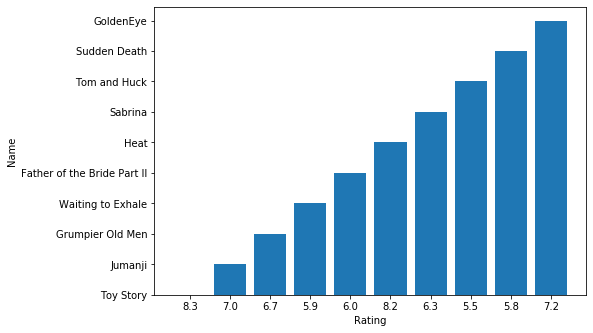

In [10]:
import matplotlib.pyplot as plt
fig=plt.figure()
axis=fig.add_axes([1,1,1,1])
axis.bar(rating,name)
plt.xlabel('Rating')
plt.ylabel('Name')
plt.show()